In [1]:
from __future__ import division, print_function
import os
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2

# coding=utf-8
import sys
import os
import glob
import re
import numpy as np
import numpy as np
from tensorflow.keras.applications.imagenet_utils import preprocess_input,decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask,redirect,url_for,request,render_template
# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

In [2]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout,Activation,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import InputLayer,Dense,Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
img_width,img_height =224,224
batch_size =32
epochs=10

In [4]:
path = r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray"

In [5]:
path

'C:\\Users\\harsha.teja\\Desktop\\myg\\deep learning\\DEEP projects\\X_ray_nemenia\\dataset\\chest_xray'

In [6]:
train_data_dir =r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray\train"
test_data_dir = r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray\test"

In [7]:
from glob import glob
glob(r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray\train/*/")

['C:\\Users\\harsha.teja\\Desktop\\myg\\deep learning\\DEEP projects\\X_ray_nemenia\\dataset\\chest_xray\\train\\NORMAL\\',
 'C:\\Users\\harsha.teja\\Desktop\\myg\\deep learning\\DEEP projects\\X_ray_nemenia\\dataset\\chest_xray\\train\\PNEUMONIA\\']

In [8]:
glob(r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray\test/*/")

['C:\\Users\\harsha.teja\\Desktop\\myg\\deep learning\\DEEP projects\\X_ray_nemenia\\dataset\\chest_xray\\test\\NORMAL\\',
 'C:\\Users\\harsha.teja\\Desktop\\myg\\deep learning\\DEEP projects\\X_ray_nemenia\\dataset\\chest_xray\\test\\PNEUMONIA\\']

In [9]:
labels = ['NORMAL',"PNEUMONIA"]

In [10]:
def show_xray(path):
    im=cv2.imread(path)
    im_resized = cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
    
    plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
    plt.show()
    

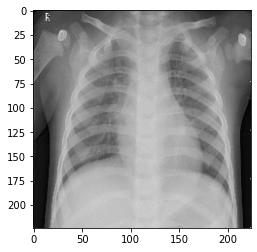

In [11]:
show_xray(r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray\train\PNEUMONIA\person1_bacteria_2.jpeg")

In [12]:
trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)

In [13]:
train =trainGen .flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test =testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)

Found 2186 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
IMAGE_SIZE = [224, 224]

In [15]:
input_shape = (img_height,img_width)

In [16]:
vgg16  = VGG16(input_shape=IMAGE_SIZE+[3], weights="imagenet", include_top =False)

In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
for layer in vgg16.layers:
    layer.trainable =False
    

In [19]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
folders =glob(r"aC:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\dataset\chest_xray\train/*/")

In [24]:
folders

[]

In [22]:
len(folders)

0

In [23]:
from tensorflow.keras.models import Model

In [24]:

# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(img_height,img_width,3),padding='same', activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test

model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.3))

#model.add(Dense(64, activation='relu'))
#model.add(Dropout(.3))#test
model.add(Conv2D(32,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.3))

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Flatten())

model.add(Dense(32, activation='relu'))

#model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

# Model summary 
model.summary()

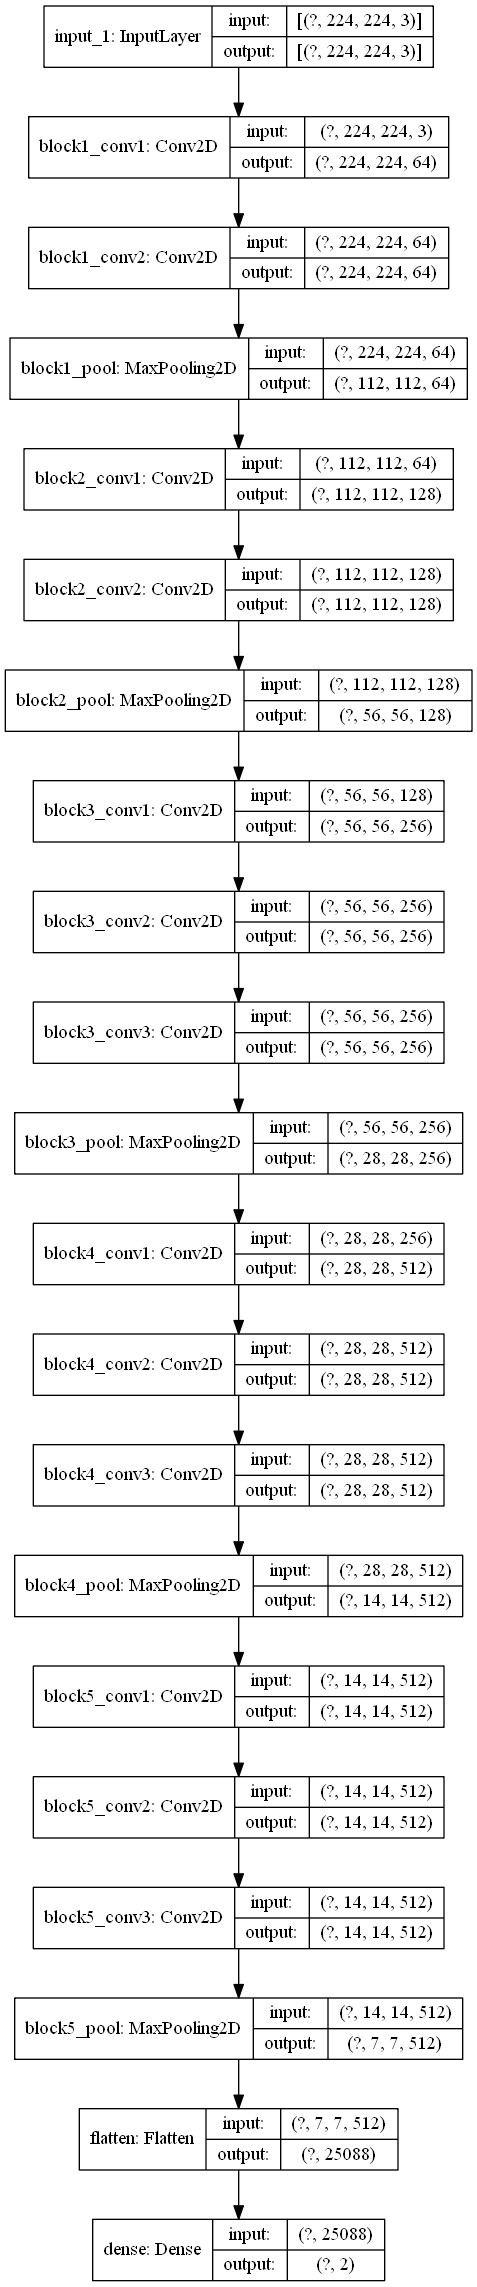

In [27]:
from tensorflow.keras.utils import plot_model
#from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

input_shape = (img_height,img_width)
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(img_height,img_width,3),padding='same', activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Flatten())

model.add(Dense(32, activation='relu'))

#model.add(BatchNormalization())
model.add(Dropout(.4))
model.add(Dense(2, activation='softmax'))

# Model summary 
model.summary()

In [43]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=train, validation_data= test, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 10 steps
Epoch 1/100
 69/100 [===================>..........] - ETA: 5:50 - loss: 0.1871 - accuracy: 0.9305

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit the model
r = model.fit_generator(
  train,
  validation_data=train,
  epochs=2,
  steps_per_epoch=len(train),
  validation_steps=len(test)
)

model.fit(train,epochs=3,validation_data=train)

In [47]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [48]:
train_loss = hist.history['loss']
train_loss

[0.18836513550889022]

In [49]:
train_acc = hist.history['accuracy']
train_acc

[0.9304666]

In [50]:
train_acc = model.history.history['accuracy']
train_acc

[0.9304666]

val_accuracy = hist.history['val_accuracy']
val_accuracy

val_loss= model.history.history['val_loss']
val_loss

In [ ]:
epochs=2

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

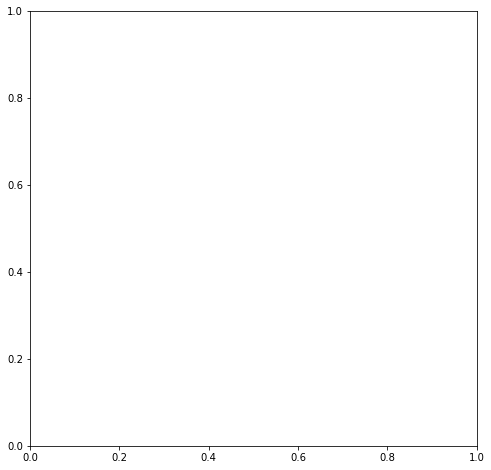

In [54]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(epochs),train_loss,color='g',label = 'trainloass')
plt.plot(np.arange(epochs),train_acc ,color='r',label = 'train_acc')
plt.plot(np.arange(epochs),val_accuracy ,color='y',label = 'val_accuracy')
plt.plot(np.arange(epochs),val_loss,color='m',label = 'val_loss')
plt.legend()
plt.xlabel('epchoss')
plt.show()

In [55]:
loss,acc=model.evaluate(test)
print('test loss',loss)
print('accuracy',acc)

  ...
    to  
  ['...']
20/20 [==============================] - 184s 9s/step - loss: 0.2718 - accuracy: 0.9022
test loss 0.2717580392956734
accuracy 0.9022436


In [ ]:
#https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [56]:
cd C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\archive\chest_xray

C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\archive\chest_xray


In [57]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [58]:
labels

['NORMAL', 'PNEUMONIA']

In [70]:
def predict_xray(path):
    im=cv2.imread(path)
    im_resized = cv2.resize(im,(224,224),interpolation=cv2.INTER_LINEAR)
    
    plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
    plt.show()
    
    img_pred =image.load_img(path,target_size=(img_height,img_width))
    img_pred = image.img_to_array(img_pred)
    #img_pred = np.expand_dims(x,axis=0)
    img = np.expand_dims(img_pred,axis =0)
     
    img=preprocess_input(img)
    #result = model.predict(img)
    #prob=model.predict_proba(img)
    
    #print('probability:{}'.format(prob[0]))
    output = model.predict(img)
    print('pridicted classes',output)
    if output[0][0] > output[0][1]:
        print("Normal")
    else:
        print('PNEUMONIA')
    print("prdicted class")
        
        

In [73]:
def predict_xray(path):
    im=cv2.imread(path)
    im_resized = cv2.resize(im,(224,224),interpolation=cv2.INTER_LINEAR)
    
    plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
    plt.show()
    
    img_pred =image.load_img(path,target_size=(img_height,img_width))
    img_pred = image.img_to_array(img_pred)
    #img_pred = np.expand_dims(x,axis=0)
    img = np.expand_dims(img_pred,axis =0)
     
    img=preprocess_input(img)
    #result = model.predict(img)
    #prob=model.predict_proba(img)
    
    #print('probability:{}'.format(prob[0]))
    prediction = model.predict_proba(image)
    predicted_class = 'pneumonia' if prediction[0] > 0.5 else 'normal'
    print('pridicted classes',output)
    if output[0][0] > output[0][1]:
        print("Normal")
    else:
        print('PNEUMONIA')
    print("prdicted class")

In [74]:
from keras.preprocessing import image

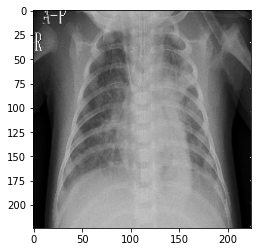

AttributeError: 'Model' object has no attribute 'predict_proba'

In [75]:
predict_xray(r"C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\archive\chest_xray\val\PNEUMONIA\person1946_bacteria_4874.jpeg")

In [35]:
cd C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\archive\chest_xray\val\NORMAL

C:\Users\harsha.teja\Desktop\myg\deep learning\DEEP projects\X_ray_nemenia\archive\chest_xray\val\NORMAL


In [63]:
## Predicitng Models


from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
#model = load_model('model_vgg19.h5')
img = image.load_img('NORMAL2-IM-1437-0001.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

FileNotFoundError: [Errno 2] No such file or directory: 'NORMAL2-IM-1437-0001.jpeg'

In [64]:
classes

array([[9.9997425e-01, 2.5772706e-05]], dtype=float32)